In [1]:
# import related libraries
import pandas as pd

# connect to file path
source = r'C:\Users\WT43970\Downloads\archive (1)\New folder\Walmart_Store_sales.csv'

df = pd.read_csv(source)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
# Check columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
# Convert object to date time
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [4]:
# Check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
# Check the number of stores
df['Store'].nunique()

45

In [7]:
# Check the start and end date
start_date = df['Date'].min()
end_date = df['Date'].max()

print(start_date, "to", end_date)

2010-02-05 00:00:00 to 2012-10-26 00:00:00


In [40]:
# Group the store by their mean weekly sales
store_mean = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

store_mean.head()

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64

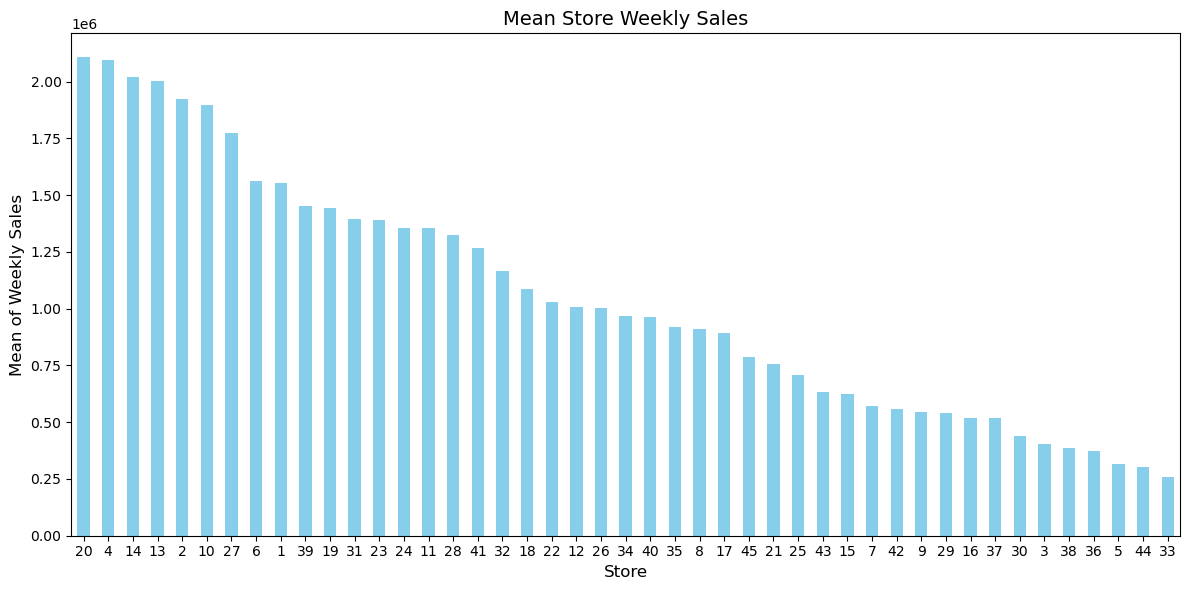

In [41]:
# Plot the mean of weekly sales by store, from high to low.
plt.figure(figsize=(12,6))
store_mean.plot(kind='bar', color='skyblue')
plt.title('Mean Store Weekly Sales', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Mean of Weekly Sales', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

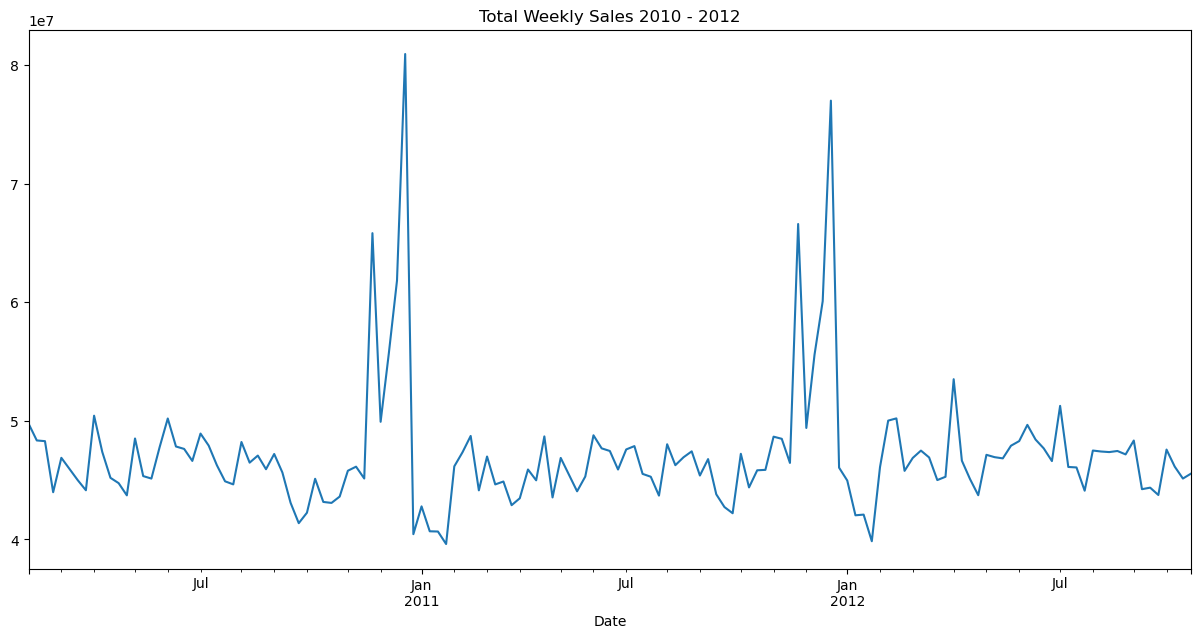

In [9]:
# Plot the weekly sales over the time period
import matplotlib.pyplot as plt

total_sales = df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(15,7), title="Total Weekly Sales 2010 - 2012")

plt.show()

In [24]:
# Calculate the standard deviation per store, this can tell you the absolute volatility of stores per week. Low is stable, high is volatile.
store_std = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

store_std.head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

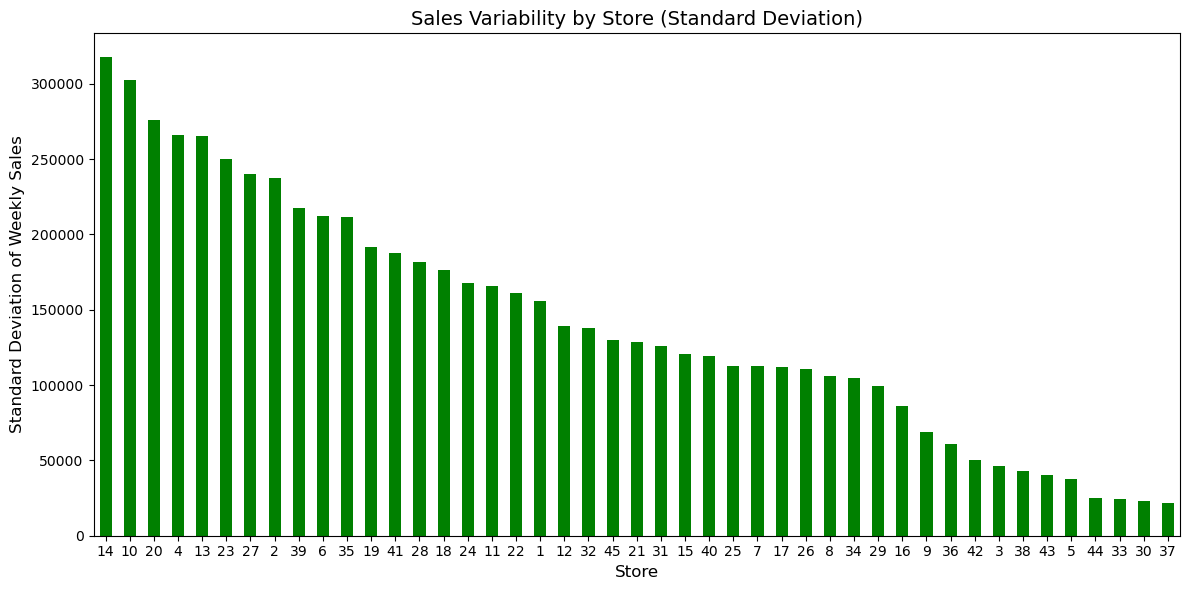

In [69]:
# Plot the standard deviation per store from high to low.
plt.figure(figsize=(12,6))
store_std.plot(kind='bar', color='green')
plt.title('Sales Variability by Store (Standard Deviation)', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Standard Deviation of Weekly Sales', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#High SD represents more volatility in their weekly sales.
#Low SD represents more consistent weekly sales.

In [13]:
# Calculate the Coefficient of Variation (CV) for each store, this method allows more fair comparisons across all stores of different sizes.
# CV = (Standard Deviation / Mean) * 100, expressed as a percentage.
# This represents relative sales volatility — higher CV means greater week-to-week fluctuations compared to the average sales.
store_stats = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'std'])
store_stats['CV'] = (store_stats['std'] / store_stats['mean']) * 100

store_cv = store_stats['CV'].sort_values(ascending=False)

store_cv.head()

Store
35    22.968111
7     19.730469
15    19.338399
29    18.374247
23    17.972115
Name: CV, dtype: float64

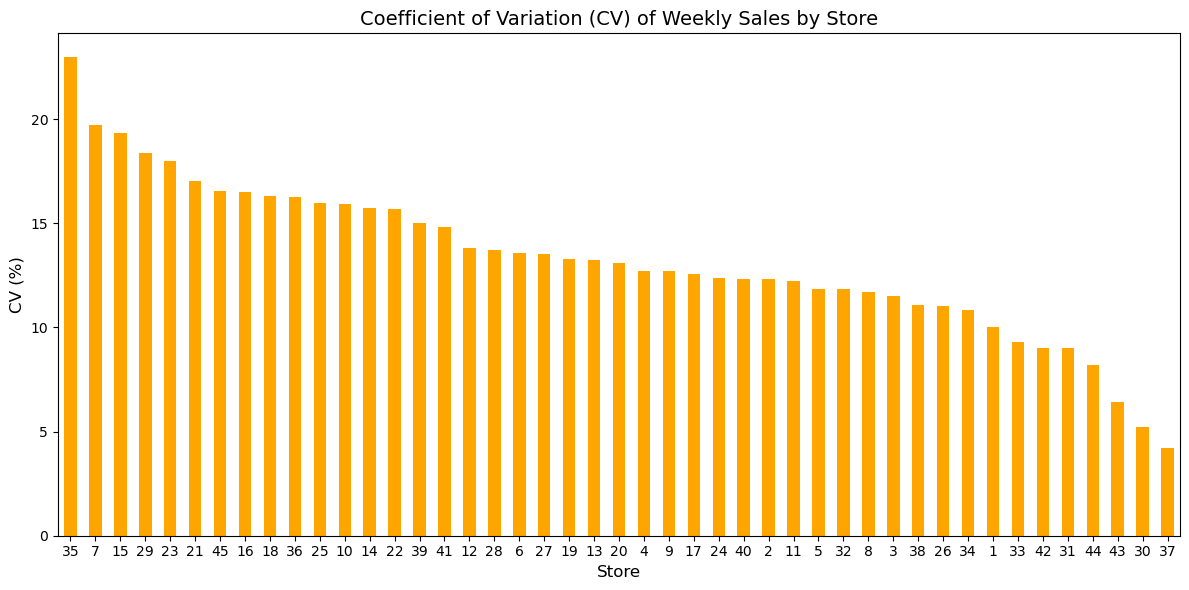

In [42]:
# Plot the Coefficient of Variation by store, from high to low.
plt.figure(figsize=(12,6))
store_cv.plot(kind='bar', color='orange')
plt.title('Coefficient of Variation (CV) of Weekly Sales by Store', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('CV (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# High CV represents more fluctuation from average sales.
# Low CV represents more stabiility in weekly sales.

In [52]:
# We want to add two new columns to label each store whether they have low, mid or high level of sales or CV.
# We make to make 3 categories,so we need to calculate the 33 and 66 quartiles.

cv_low = store_stats['CV'].quantile(0.33)
cv_high = store_stats['CV'].quantile(0.66)

# Categorize CV
def categorize_cv(cv):
    if cv <= cv_low:
        return 'Low CV'
    elif cv <= cv_high:
        return 'Medium CV'
    else:
        return 'High CV'

store_stats['CV_Category'] = store_stats['CV'].apply(categorize_cv)

# Sales

# Define quantile cutoffs for Sales
sales_low = store_stats['mean'].quantile(0.33)
sales_high = store_stats['mean'].quantile(0.66)

# Categorize Sales
def categorize_sales(sales):
    if sales <= sales_low:
        return 'Low Sales'
    elif sales <= sales_high:
        return 'Medium Sales'
    else:
        return 'High Sales'

store_stats['Sales_Category'] = store_stats['mean'].apply(categorize_sales)

store_stats[['Store', 'mean', 'CV', 'CV_Category', 'Sales_Category']].head(10)


,Store,mean,CV,CV_Category,Sales_Category
0,1,1.555264e+06,10.029212,Low CV,High Sales
1,2,1.925751e+06,12.342388,Medium CV,High Sales
2,3,4.027044e+05,11.502141,Low CV,Low Sales
3,4,2.094713e+06,12.708254,Medium CV,High Sales
4,5,3.180118e+05,11.866844,Low CV,Low Sales
5,6,1.564728e+06,13.582286,Medium CV,High Sales
6,7,5.706173e+05,19.730469,High CV,Low Sales
7,8,9.087495e+05,11.695283,Low CV,Medium Sales
8,9,5.439806e+05,12.689547,Medium CV,Low Sales
9,10,1.899425e+06,15.913349,High CV,High Sales


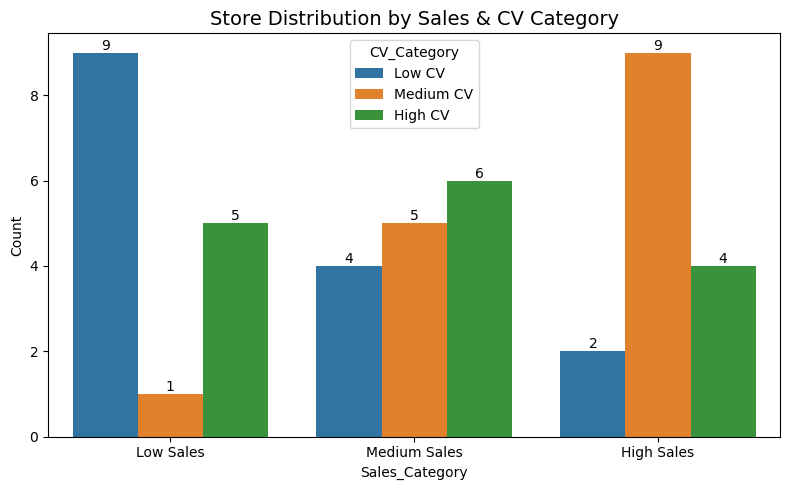

In [53]:
# We want to visualize the number of store by each category
import seaborn as sns

# Ensure ascending order for CV_Category
cv_order = ['Low CV', 'Medium CV', 'High CV']
store_stats['CV_Category'] = pd.Categorical(store_stats['CV_Category'],categories=cv_order,ordered=True)

# Ensure ascending order for Sales_Category
sales_order = ['Low Sales', 'Medium Sales', 'High Sales']
store_stats['Sales_Category'] = pd.Categorical(store_stats['Sales_Category'],categories=sales_order,ordered=True)

# Count the number of groups
combo_counts = store_stats.groupby(['Sales_Category', 'CV_Category'], observed=False).size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Sales_Category',
    y='Count',
    hue='CV_Category',
    hue_order=cv_order,
    order=sales_order,
    data=combo_counts
)

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Store Distribution by Sales & CV Category', fontsize=14)
plt.tight_layout()
plt.show()


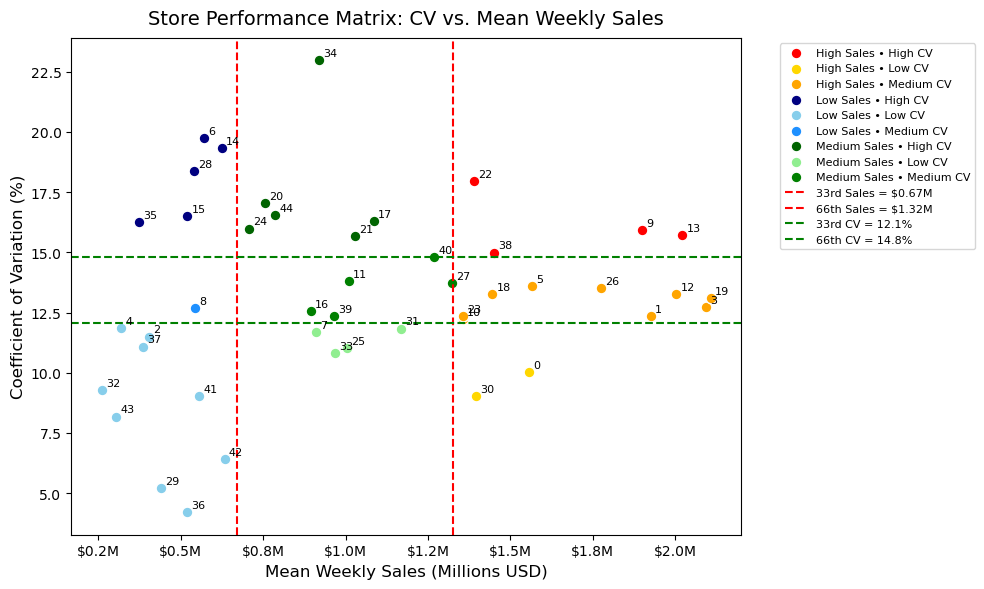

In [68]:
# Now we want to plot a matrix that visualize the placement of each store with an x-axis of Mean weekly sales and a Y-axis of Coefficient of Varations.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

#Prepare categories for different colors
sales_order = ['Low Sales', 'Medium Sales', 'High Sales']
cv_order = ['Low CV', 'Medium CV', 'High CV']

# Create a combined category for coloring
store_stats['Category_Combo'] = store_stats['Sales_Category'].astype(str) + " • " + store_stats['CV_Category'].astype(str)

# Assign colors to each category combo
color_map = {
    'Low Sales • Low CV': 'skyblue',
    'Low Sales • Medium CV': 'dodgerblue',
    'Low Sales • High CV': 'navy',
    'Medium Sales • Low CV': 'lightgreen',
    'Medium Sales • Medium CV': 'green',
    'Medium Sales • High CV': 'darkgreen',
    'High Sales • Low CV': 'gold',
    'High Sales • Medium CV': 'orange',
    'High Sales • High CV': 'red'
}

# Scale mean to millions for plotting
store_stats['mean_m'] = store_stats['mean'] / 1e6

# Percentile thresholds
mean_33 = np.percentile(store_stats['mean_m'], 33)
mean_66 = np.percentile(store_stats['mean_m'], 66)
cv_33 = np.percentile(store_stats['CV'], 33)
cv_66 = np.percentile(store_stats['CV'], 66)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

for category, group in store_stats.groupby('Category_Combo'):
    ax.scatter(group['mean_m'], group['CV'],
               s=60, edgecolor='white',
               color=color_map.get(category, 'gray'),
               label=category)

# Vertical percentile lines
ax.axvline(mean_33, color='red', linestyle='--', label=f'33rd Sales = ${mean_33:,.2f}M')
ax.axvline(mean_66, color='red', linestyle='--', label=f'66th Sales = ${mean_66:,.2f}M')

# Horizontal percentile lines
ax.axhline(cv_33, color='green', linestyle='--', label=f'33rd CV = {cv_33:.1f}%')
ax.axhline(cv_66, color='green', linestyle='--', label=f'66th CV = {cv_66:.1f}%')

# Label store numbers
for store, row in store_stats.iterrows():
    ax.annotate(str(store),
                (row['mean_m'], row['CV']),
                textcoords='offset points', xytext=(3, 3), ha='left', fontsize=8)

# Axis formatting
ax.set_title('Store Performance Matrix: CV vs. Mean Weekly Sales', fontsize=14, pad=10)
ax.set_xlabel('Mean Weekly Sales (Millions USD)', fontsize=12)
ax.set_ylabel('Coefficient of Variation (%)', fontsize=12)
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'${v:,.1f}M'))

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

fig.tight_layout()
plt.show()

# Top-Right Zone (High Sales, High CV) → Large revenue but volatile; potential for big gains if stabilized.
# Top-Mid Zone (Medium Sales, High CV) → Mid-tier revenue but unpredictable; targeted risk management needed.
# Top-Left Zone (Low Sales, High CV) → Low revenue and volatile; low priority unless volatility can be reduced.
# Mid-Right Zone (High Sales, Medium CV) → High revenue, moderate stability; good for cautious expansion.
# Mid-Mid Zone (Medium Sales, Medium CV) → Average performance; monitor for upward movement.
# Mid-Left Zone (Low Sales, Medium CV) → Small stores, moderate stability; selective investment.
# Bottom-Right Zone (High Sales, Low CV) → Strong and stable; ideal for forecasting and replication.
# Bottom-Mid Zone (Medium Sales, Low CV) → Decent revenue, very stable; solid base performers.
# Bottom-Left Zone (Low Sales, Low CV) → Low impact but predictable; may not warrant aggressive growth.

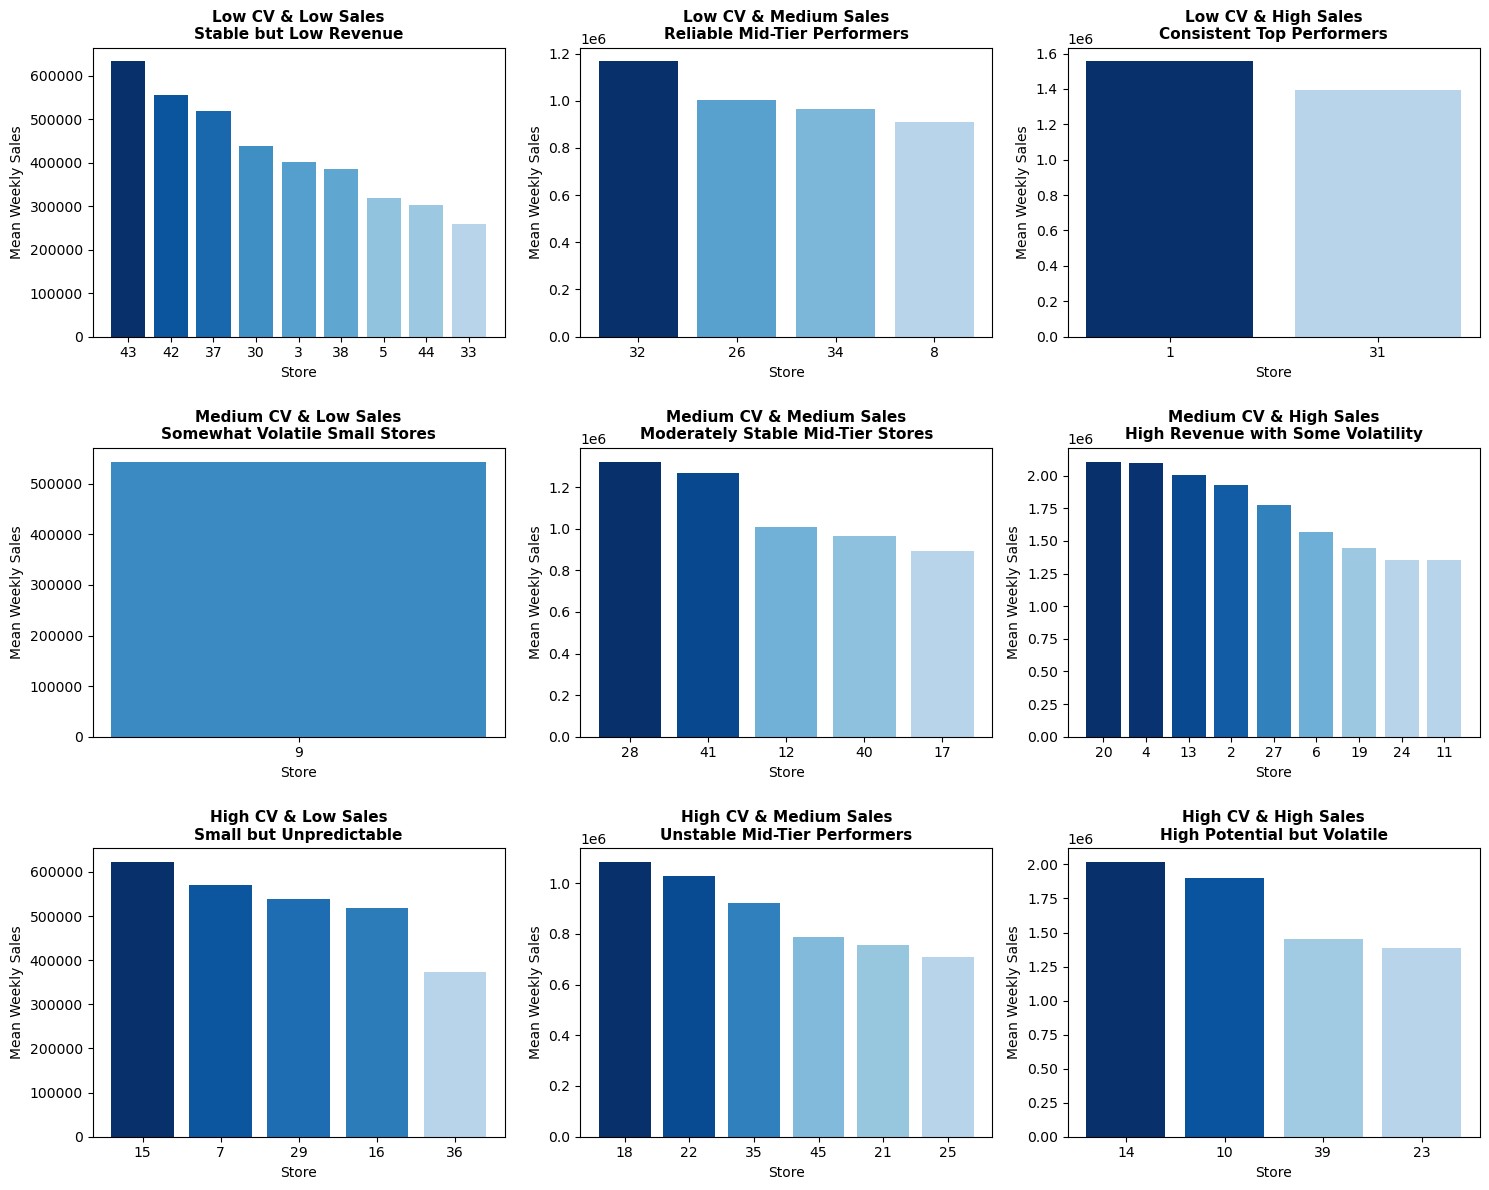

In [67]:
# Now we want to plot a 3x3 bar charts to visualize the stores and their mean weekly_sales in each category
import matplotlib.pyplot as plt
from matplotlib import cm

# Orders
cv_order = ['Low CV', 'Medium CV', 'High CV']
sales_order = ['Low Sales', 'Medium Sales', 'High Sales']

# Ensure categories are ordered
store_stats['CV_Category'] = pd.Categorical(store_stats['CV_Category'], categories=cv_order, ordered=True)
store_stats['Sales_Category'] = pd.Categorical(store_stats['Sales_Category'], categories=sales_order, ordered=True)

# Short business descriptions for each combo
descriptions = {
    ('Low CV', 'Low Sales'): 'Stable but Low Revenue',
    ('Low CV', 'Medium Sales'): 'Reliable Mid-Tier Performers',
    ('Low CV', 'High Sales'): 'Consistent Top Performers',
    ('Medium CV', 'Low Sales'): 'Somewhat Volatile Small Stores',
    ('Medium CV', 'Medium Sales'): 'Moderately Stable Mid-Tier Stores',
    ('Medium CV', 'High Sales'): 'High Revenue with Some Volatility',
    ('High CV', 'Low Sales'): 'Small but Unpredictable',
    ('High CV', 'Medium Sales'): 'Unstable Mid-Tier Performers',
    ('High CV', 'High Sales'): 'High Potential but Volatile'
}

# Group in desired order
combos = store_stats.groupby(['CV_Category', 'Sales_Category'], observed=False)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Darker gradient
blues_full = plt.colormaps['Blues']  
def blues_darker(vals):
    return blues_full(0.3 + 0.7 * vals) 

# Plot each category combo
for i, ((cv_cat, sales_cat), group) in enumerate(combos):
    group_sorted = group.sort_values('mean', ascending=False)

    # Normalize within each subplot
    mn, mx = group_sorted['mean'].min(), group_sorted['mean'].max()
    if mx == mn:
        normed = pd.Series([0.5] * len(group_sorted), index=group_sorted.index)
    else:
        normed = (group_sorted['mean'] - mn) / (mx - mn)

    colors = blues_darker(normed.values)

    axes[i].bar(group_sorted['Store'].astype(str), group_sorted['mean'], color=colors)
    axes[i].set_title(
        f'{cv_cat} & {sales_cat}\n{descriptions[(cv_cat, sales_cat)]}',
        fontsize=11, fontweight='bold'
    )
    axes[i].set_ylabel('Mean Weekly Sales')
    axes[i].set_xlabel('Store')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()



In [19]:
# Now we add a new column for recommendations based on the store CV and Sales Categories
def store_recommendation(cv_cat, sales_cat):
    if cv_cat == 'Low CV' and sales_cat == 'Low Sales':
        return "Stable but low revenue – explore marketing or product expansion."
    elif cv_cat == 'Low CV' and sales_cat == 'Medium Sales':
        return "Reliable performers – maintain strategy and optimize gradually."
    elif cv_cat == 'Low CV' and sales_cat == 'High Sales':
        return "Consistent top performers – ideal for piloting new initiatives."
    elif cv_cat == 'Medium CV' and sales_cat == 'Low Sales':
        return "Some volatility – investigate causes and stabilize performance."
    elif cv_cat == 'Medium CV' and sales_cat == 'Medium Sales':
        return "Moderately stable – fine-tune promotions for growth."
    elif cv_cat == 'Medium CV' and sales_cat == 'High Sales':
        return "High revenue but variable – plan inventory for fluctuations."
    elif cv_cat == 'High CV' and sales_cat == 'Low Sales':
        return "Small but unpredictable – stabilize before scaling."
    elif cv_cat == 'High CV' and sales_cat == 'Medium Sales':
        return "Unstable mid-tier – adjust stock and staffing strategies."
    elif cv_cat == 'High CV' and sales_cat == 'High Sales':
        return "High potential but volatile – enhance forecasting & holiday planning."

store_stats['Recommendation'] = store_stats.apply(lambda x: store_recommendation(x['CV_Category'], x['Sales_Category']), axis=1)

store_stats[['Store', 'CV_Category', 'Sales_Category', 'Recommendation']].head()


,Store,CV_Category,Sales_Category,Recommendation
0,1,Low CV,High Sales,Consistent top performers – ideal for piloting...
1,2,Medium CV,High Sales,High revenue but variable – plan inventory for...
2,3,Low CV,Low Sales,Stable but low revenue – explore marketing or ...
3,4,Medium CV,High Sales,High revenue but variable – plan inventory for...
4,5,Low CV,Low Sales,Stable but low revenue – explore marketing or ...


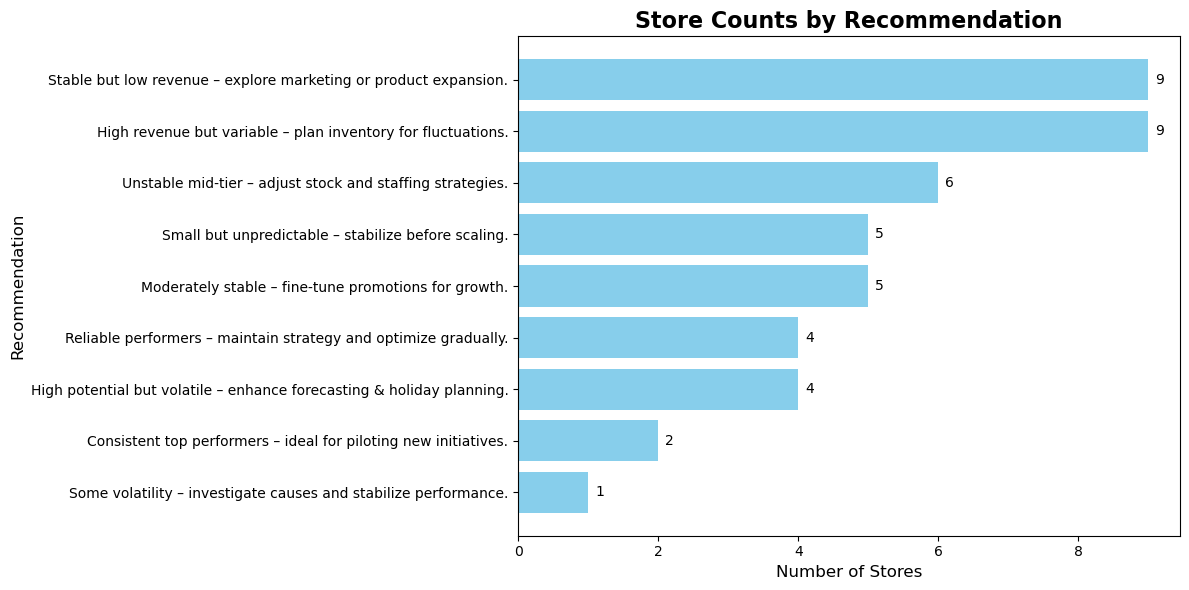

In [20]:
# Now we visualize in a different way of the number of stores in each categories
# Count number of stores per recommendation
rec_totals = store_stats.groupby("Recommendation").size().reset_index(name="Count")

# Sort from highest to lowest
rec_totals = rec_totals.sort_values("Count", ascending=True)  # ascending for horizontal bar chart

# Plot
plt.figure(figsize=(12,6))
bars = plt.barh(rec_totals["Recommendation"], rec_totals["Count"], color='skyblue')

# Add labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f"{int(width)}", va='center', fontsize=10)

# Titles & labels
plt.title("Store Counts by Recommendation", fontsize=16, fontweight='bold')
plt.xlabel("Number of Stores", fontsize=12)
plt.ylabel("Recommendation", fontsize=12)

plt.tight_layout()
plt.show()